<a href="https://colab.research.google.com/github/VaradS96/-LoanTap-Case-Study-Logistic-Regression-/blob/main/LoanTap_Business_Case_VS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 1.   **Problem Statement:**

 LoanTap, an innovative online platform, specializes in offering customized loan products tailored to the needs of millennials. They aim to revolutionize the traditional loan segment by providing instant, flexible loans with consumer-friendly terms to salaried professionals and businessmen. LoanTap now seeks to enhance its credit evaluation process by developing a predictive model to determine whether to extend a credit line to individuals and, if approved, suggest appropriate repayment terms.
# 2.   **Approach:**
 Review the dataset provided by LoanTap, examining attributes such as age, income, employment status, and credit score. Employ machine learning algorithms like logistic regression or random forest to build a predictive model for determining creditworthiness based on the identified attributes. Assess the model's performance using metrics like accuracy, precision, recall, and F1-score through cross-validation. For creditworthy individuals, propose appropriate repayment terms including loan amount, interest rate, and tenure based on their risk profile and financial capacity.  Integrate the developed predictive model into LoanTap's existing system to automate credit evaluation and streamline the loan approval process, enhancing customer experience and minimizing default risks.




# **Please visit the google colab link for any missing data,graph,observation and recomendations**
# In PDF there are some graphs missing and observations too missing. Please visit  the link for evaluation of marks.
# https://colab.research.google.com/drive/1l8NQhtyiS2LzYrnzuR79tMMXl4tv-ti4?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import ConfusionMatrixDisplay



In [ ]:
!gdown 1EBAgscDx0Is-LEHR2KEmHCd_AdzO9UtY

Downloading...
From: https://drive.google.com/uc?id=1EBAgscDx0Is-LEHR2KEmHCd_AdzO9UtY
To: /content/Loantap.csv
100% 100M/100M [00:01<00:00, 52.7MB/s] 


In [ ]:
df= pd.read_csv('Loantap.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.shape

(396030, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

# **Observation:-**
Given the dataset containing the mixture of 'Numerical' and 'Categorical' data along with the need to preprocess certain 'Categorical' columns for analysis, an initial step of data extraction and conversion will be conducted to ensure their Suitability for future analysis

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [ ]:
df.duplicated().sum()

0

Here we have no **Duplicate** values in dataset.

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

# Extracting the Year from the 'Earliest Credit Line' column and converting its data type from String to Integer to create the Earliest Year column.

In [ ]:
df['earliest_year']= df['earliest_cr_line'].str.split('-').str[-1]
df['earliest_year'] = pd.to_numeric(df['earliest_year'])

# Extraction of Pincode from Address column from the dataset:-

In [ ]:
df['pin_code']= df['address'].str.split(' ').str[-1]

# Extracting Year from 'Issue_d' column and Converting the datatype of 'Issued Year' column from String to Integer.

In [ ]:
df['issued_year'] = df['issue_d'].str.split('-').str[-1]
df['issued_year'] = pd.to_numeric(df['issued_year'])

In [ ]:
columns_drop = ['earliest_cr_line', 'address', 'issue_d']
df= df.drop (columns= columns_drop)

# Observation-
The dataset contains both Categorical and Numerical data. Converting Categorical data to Nimerical data type offers several advantages-

1.   Memory Effeciency
2.   Faster operations
3.   Ordered Categories



# Converting Categorical data from Object Datatype to Category Datatype-

In [ ]:
for column in ( 'term' , 'grade', 'sub_grade', 'emp_title', 'emp_length','home_ownership', 'verification_status' , 'loan_status', 'purpose' , 'title' , 'initial_list_status' ,'application_type'):
  df[column] = df[column].astype('category')


# **Analysis on Univariate with Continuous**
Univaraite analysis of Individual columns aids in understanding the data Distribution.
For Categorical columns, its crucial to ascertain whether the data exhibits any discernible categorization or if the column comprises random value that offer no actionable insights

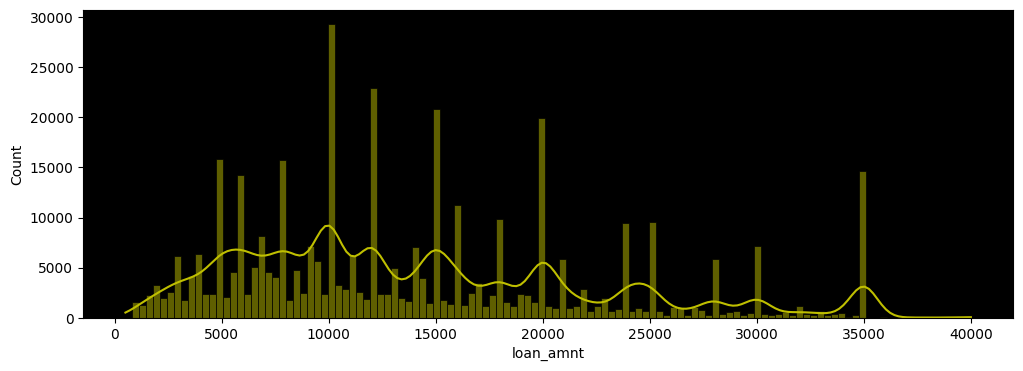

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['loan_amnt'],kde=True,color='y')
ax= plt.gca()
ax.set_facecolor('Black')

# **Observation**
# The graph depicts that the significant number of individuals have taken loan of $10000, which appears to be most common loan amount.
# Furthermore, it is evident that loan amounts are distributed across various values, indicating that loans have been taken at almost every value


In [ ]:
continuous= df.select_dtypes('float64').columns.to_list()
continuous

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

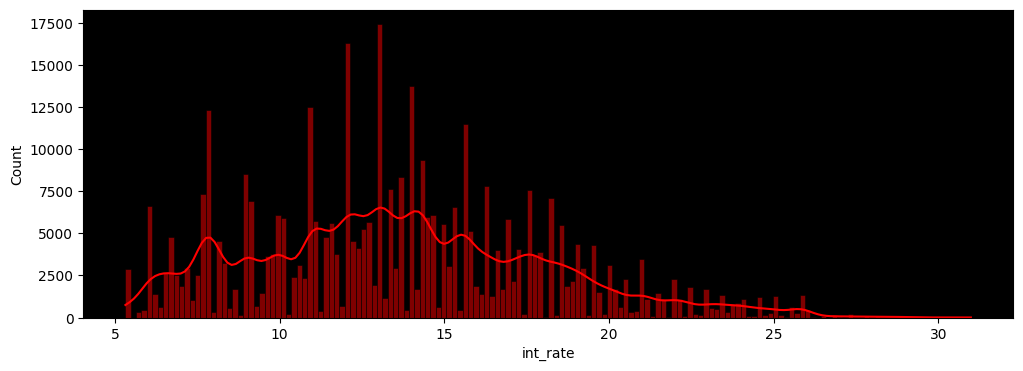

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['int_rate'],kde=True,color='r')
ax= plt.gca()
ax.set_facecolor('Black')

# **Observation**
# The graph displays the Interest rate chosen by individuals who have taken out loan.
#According to the graph, the highest interest rates are predominantly within the range of 10% to 15%.
# Specifically , the majority of individuals have selected interest rates between 12% and 14% indicating their prefrence for loans at this rate.

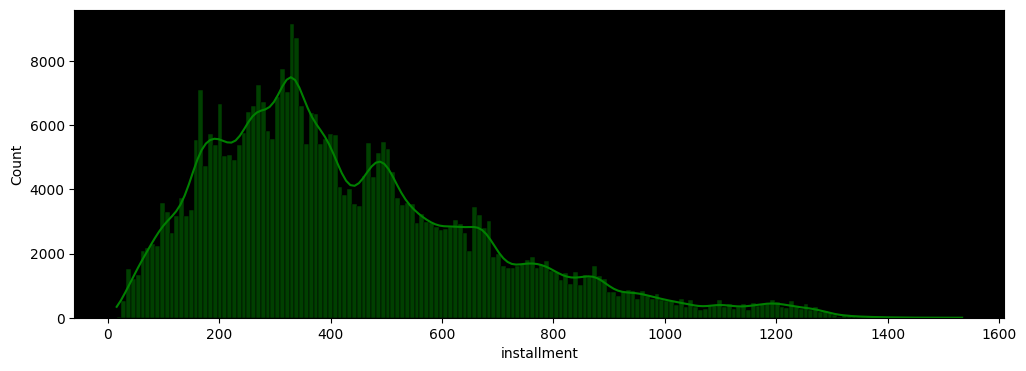

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['installment'],kde=True,color='g')
ax= plt.gca()
ax.set_facecolor('Black')

# **Observation**
# The graph represents the monthly installment amount paid by individuals who have taken out loans. It indicates that the most common installment amount falls within the range of 200-400, with individuals repaying their loan amount on specified dates throughout the month.

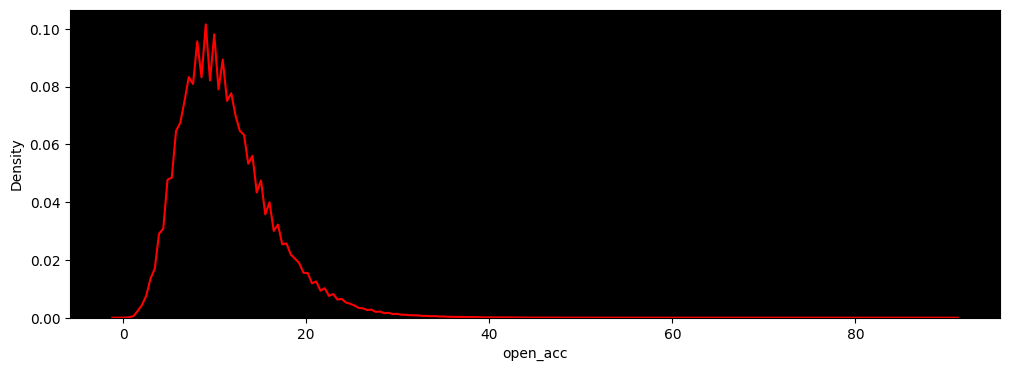

In [ ]:
plt.figure(figsize=(12,4))
sns.kdeplot(df['open_acc'],color='red')
ax= plt.gca()
ax.set_facecolor('Black')

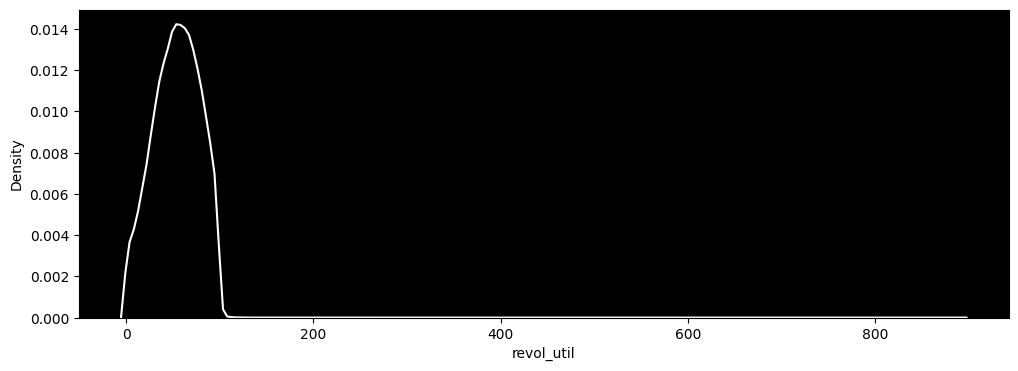

In [ ]:
plt.figure(figsize=(12,4))
sns.kdeplot(df['revol_util'],color='white')
ax= plt.gca()
ax.set_facecolor('Black')

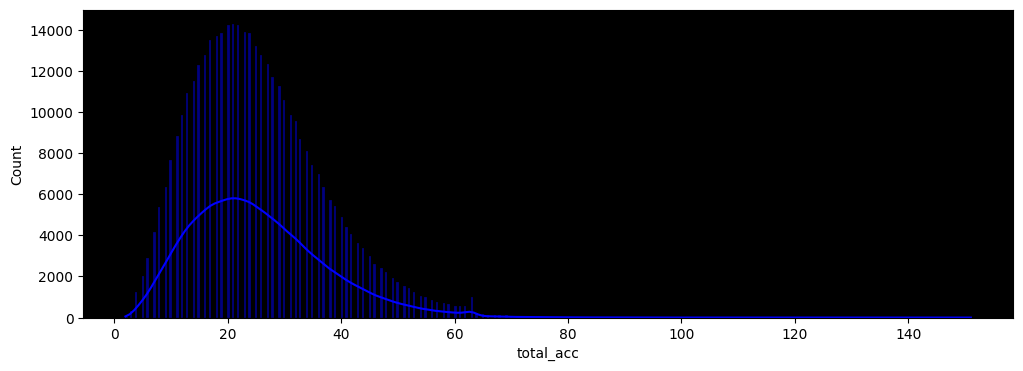

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['total_acc'],kde=True,color='blue')
ax= plt.gca()
ax.set_facecolor('Black')

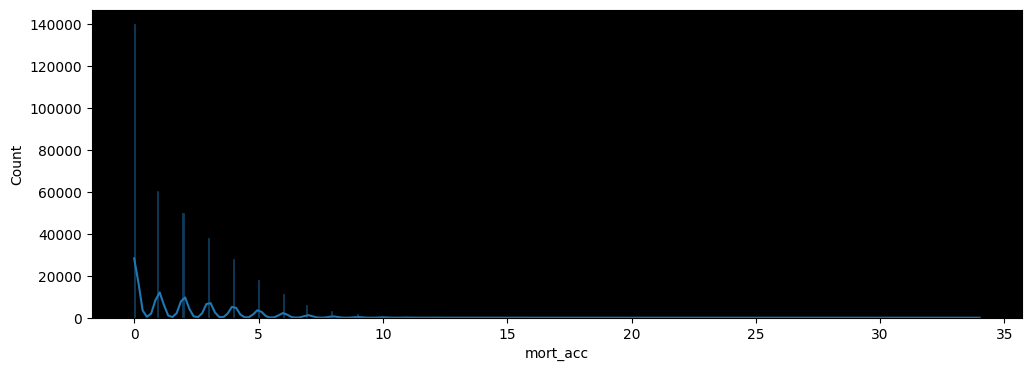

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['mort_acc'],kde=True)
ax= plt.gca()
ax.set_facecolor('Black')

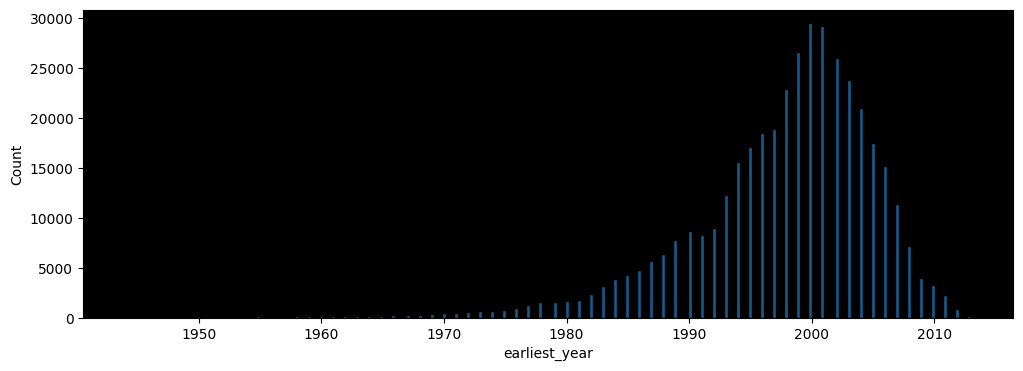

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['earliest_year'])
ax= plt.gca().set_facecolor('Black')
plt.show()

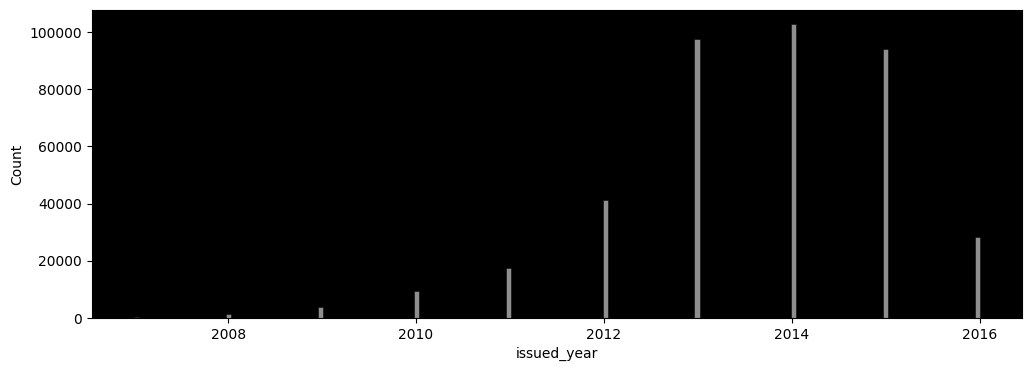

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['issued_year'],color='silver')
ax= plt.gca().set_facecolor('Black')
plt.show()

# **Univariate Analysis with Categorical Values**

In [ ]:
for column in ( 'term' , 'grade', 'sub_grade', 'emp_title', 'emp_length','home_ownership', 'verification_status' , 'loan_status', 'purpose' , 'title' , 'initial_list_status' ,'application_type', 'earliest_year','pin_code'):
  print(f" {column}:{'-->'* (2-len(column))}{df[column].nunique()}")

 term:2
 grade:7
 sub_grade:35
 emp_title:173105
 emp_length:11
 home_ownership:6
 verification_status:3
 loan_status:2
 purpose:14
 title:48816
 initial_list_status:2
 application_type:3
 earliest_year:65
 pin_code:10


# **Observation**
# After examining the unique values above, it is evident that the 'employee title' and 'title' columns lack a discrenible pattern. The large number of unique values, numbering in the hundreds of thousands, indicate the organized categorization. Consequently these columns will be omitted from further analysis as they offer limited potential for deriving meaningful insights

In [ ]:
category_column_drop= ['emp_title','title']
df= df.drop(columns=category_column_drop)

In [ ]:
df['term'].value_counts(normalize=True)*100

term
 36 months    76.258112
 60 months    23.741888
Name: proportion, dtype: float64

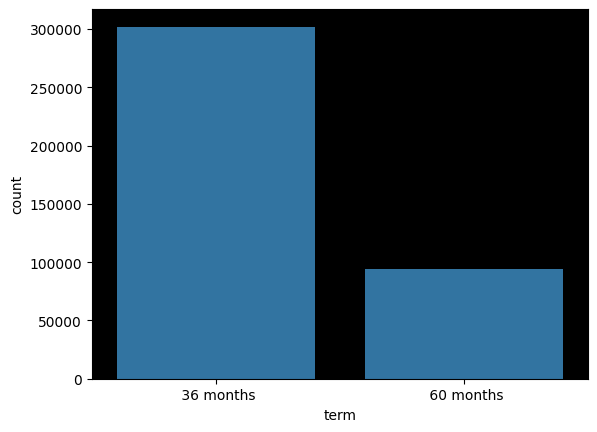

In [ ]:
sns.countplot(data=df, x=df['term'])
ax=plt.gca()
ax.set_facecolor('Black')
plt.show()

# **Observation**
# The graph illustrates the loan tenure options of 36 months and 60 months chosen by indivudials.
# It is evident that the majority of individuals have opted for 36 months tenure, while fewer have selected 60 months tenure.
# Thus we can infer that most people prefer the 36 months loan term based on graph.

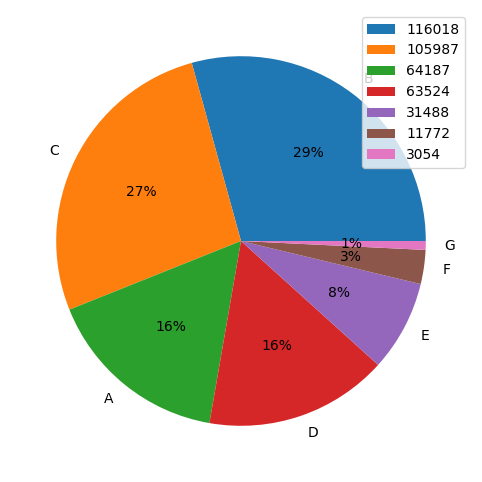

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(df['grade'].value_counts(),labels=df['grade'].value_counts().index, autopct='%.0f%%')
plt.legend(labels=df['grade'].value_counts(),loc='upper right')
plt.show()

# **Observation**
# The graph displays the distribution of loan grades and the corresponding percentage of individuals categorized within each grade. It shows that the highest percentage of people are assigned the "B" grade, while the lowest percentage are assigned "G" grade.

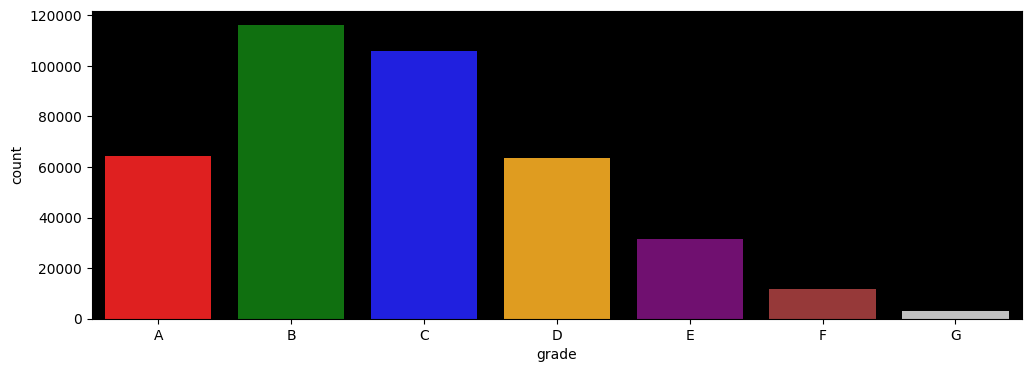

In [ ]:
plt.figure(figsize=(12,4))
colors = ['red', 'green', 'blue', 'orange', 'purple','brown','silver']
sns.countplot(data= df, x=df['grade'],palette=colors)
ax= plt.gca()
ax.set_facecolor('Black')

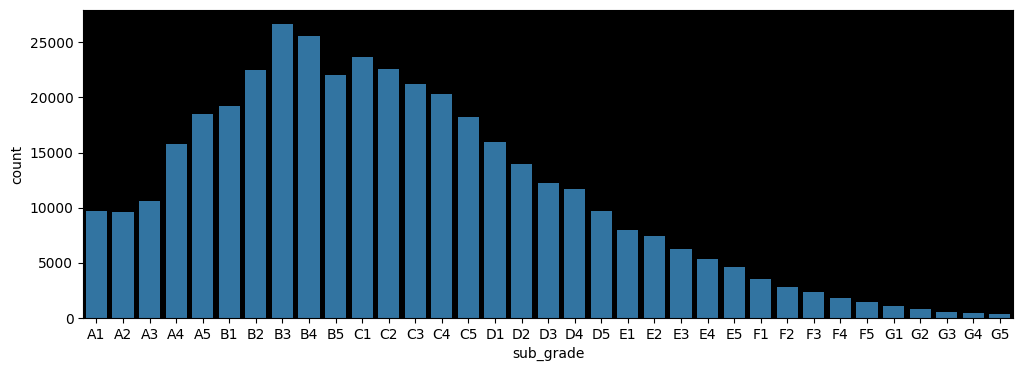

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(data= df, x=df['sub_grade'])
ax= plt.gca()
ax.set_facecolor('Black')
plt.show()

# **Observation**
# Within the loan grades , LoanTap futher subdivides them into subgrades. Notably the subgrade "B" contains the largest number of instances, indicating that a significant portion of the population falls within this category.

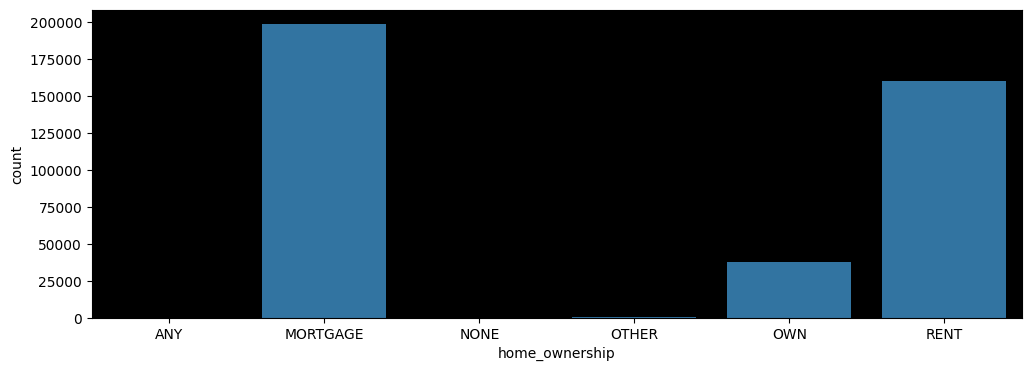

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(data= df, x=df['home_ownership'])
ax= plt.gca()
ax.set_facecolor('Black')
plt.show()

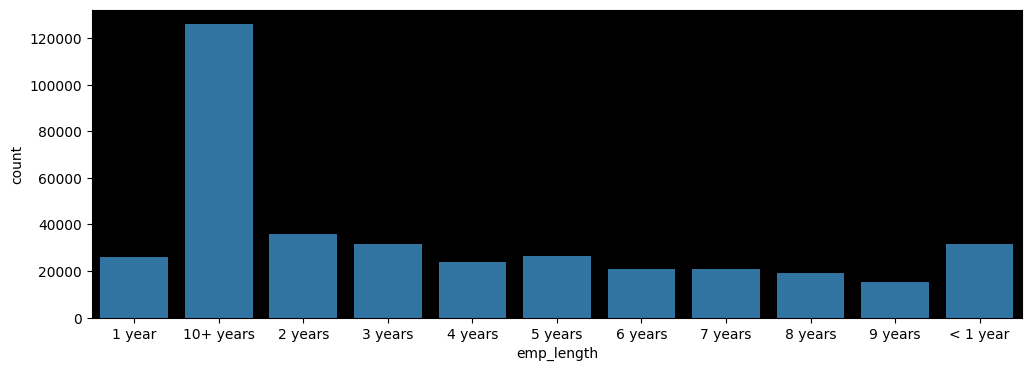

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(data= df, x=df['emp_length'])
ax= plt.gca()
ax.set_facecolor('Black')
plt.show()

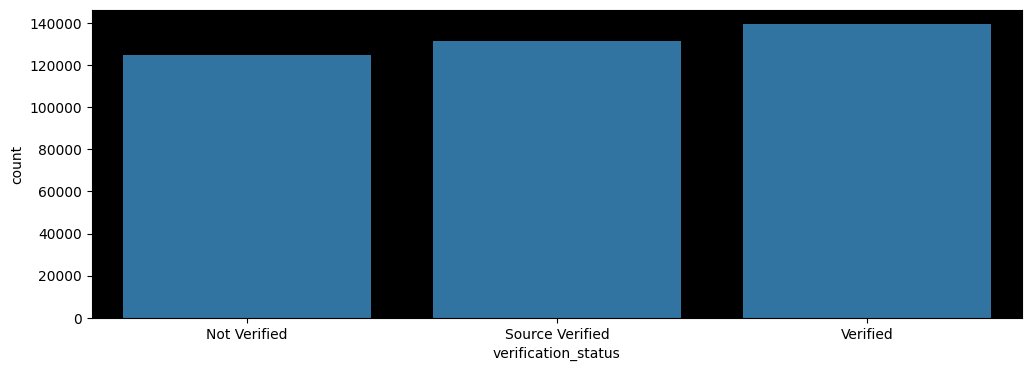

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(data= df, x=df['verification_status'])
ax= plt.gca()
ax.set_facecolor('Black')
plt.show()

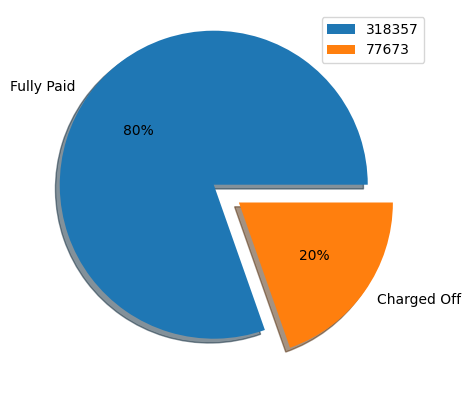

In [ ]:
plt.figure(figsize=(12,5))
plt.pie(df['loan_status'].value_counts(),labels=df['loan_status'].value_counts().index,autopct='%.0f%%', explode=[0.2,0],shadow= True)
plt.legend(labels=df['loan_status'].value_counts(), loc='upper right')
plt.show()

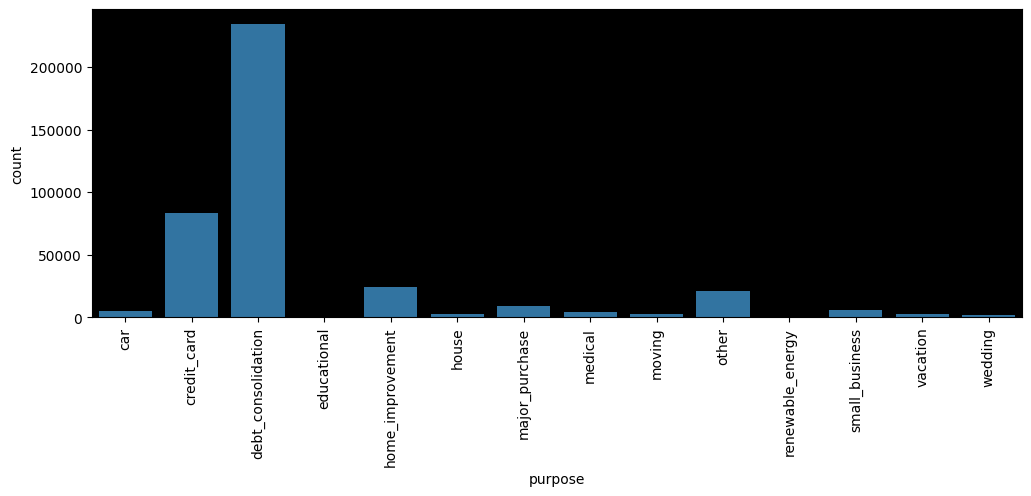

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(data= df, x=df['purpose'])
ax= plt.gca()
ax.set_facecolor('Black')
plt.xticks(rotation=90)
plt.show()

# **Observation**
# The graph reveals that the majority of individuals primarily use their cards for debt consolidation, with credit cards usage following closely behind.
# This suggests that people are increasingly utilizing cards to manage and pay off their debts, indicating a focus on financial responsibility and fulfillment of financial needs.

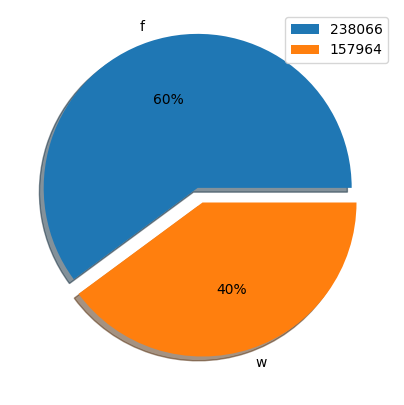

In [ ]:
plt.figure(figsize=(12,5))
plt.pie(df['initial_list_status'].value_counts(),labels=df['initial_list_status'].value_counts().index,autopct='%.0f%%', explode=[0.1,0],shadow= True)
plt.legend(labels=df['initial_list_status'].value_counts(), loc='upper right')
plt.show()

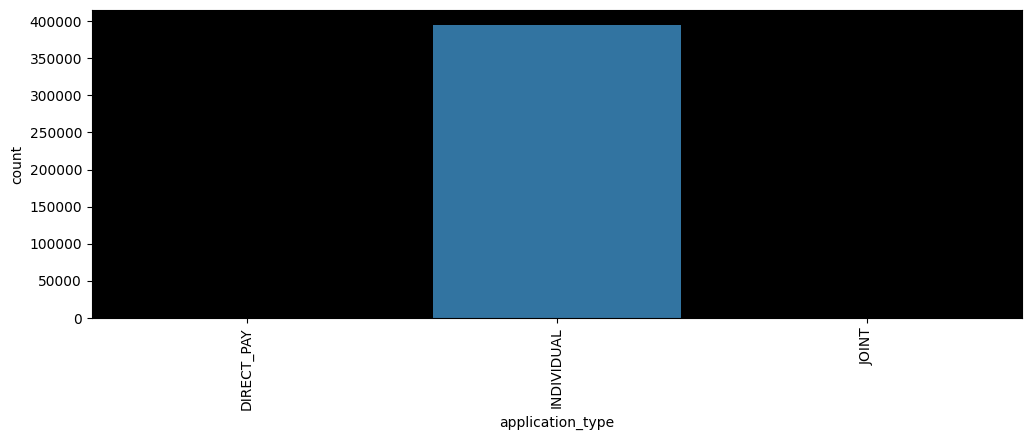

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(data= df, x=df['application_type'])
ax= plt.gca()
ax.set_facecolor('Black')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['application_type'].value_counts(normalize=True)

application_type
INDIVIDUAL    0.998205
JOINT         0.001073
DIRECT_PAY    0.000722
Name: proportion, dtype: float64

# **Bi-Variate Analysis**

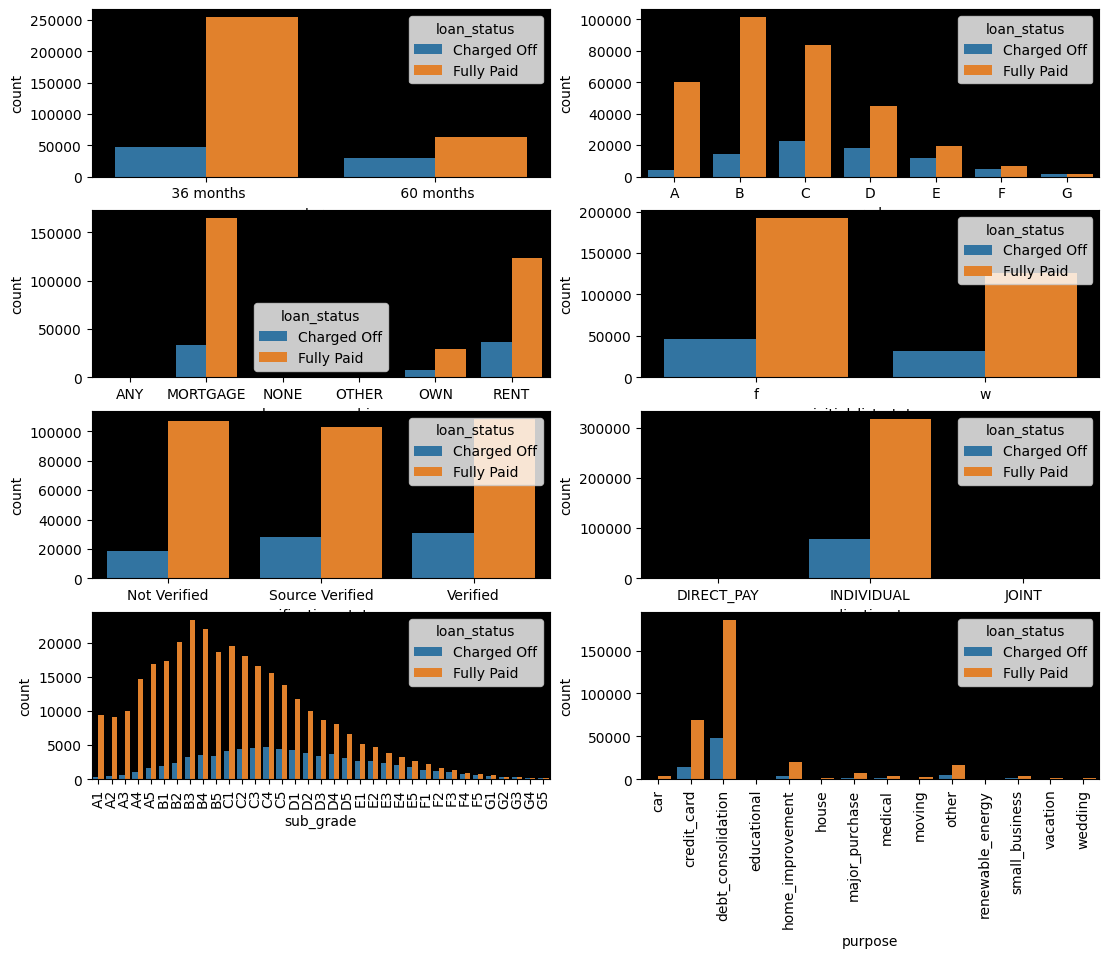

In [ ]:
plt.figure(figsize=(13,10))

plt.subplot(4,2,1)
sns.countplot(data=df, x='term',hue='loan_status')
plt.gca().set_facecolor('black');

plt.subplot(4,2,2)
sns.countplot(data=df, x='grade',hue='loan_status')
plt.gca().set_facecolor('black');

plt.subplot(4,2,3)
sns.countplot(data=df, x='home_ownership',hue='loan_status')
plt.gca().set_facecolor('black');

plt.subplot(4,2,4)
sns.countplot(data=df, x='initial_list_status',hue='loan_status')
plt.gca().set_facecolor('black');

plt.subplot(4,2,5)
sns.countplot(data=df, x='verification_status',hue='loan_status')
plt.gca().set_facecolor('black');

plt.subplot(4,2,6)
sns.countplot(data=df, x='application_type',hue='loan_status')
plt.gca().set_facecolor('black');

plt.subplot(4,2,7)
sns.countplot(data=df, x='sub_grade',hue='loan_status')
plt.xticks(rotation=90)
plt.gca().set_facecolor('black');

plt.subplot(4,2,8)
sns.countplot(data=df, x='purpose',hue='loan_status')
plt.xticks(rotation=90)
plt.gca().set_facecolor('black');

plt.show()

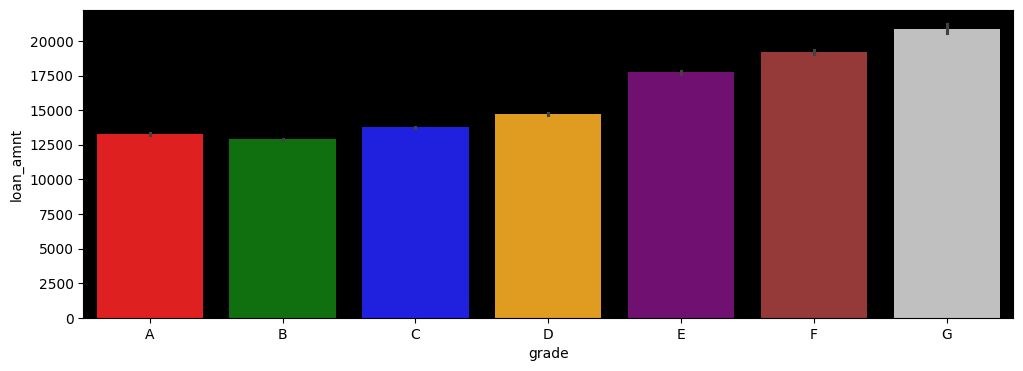

In [ ]:
plt.figure(figsize=(12,4))
colors = ['red', 'green', 'blue', 'orange', 'purple','brown','silver']
sns.barplot(data= df, x=df['grade'],y=df['loan_amnt'],palette=colors)
ax= plt.gca()
ax.set_facecolor('Black')

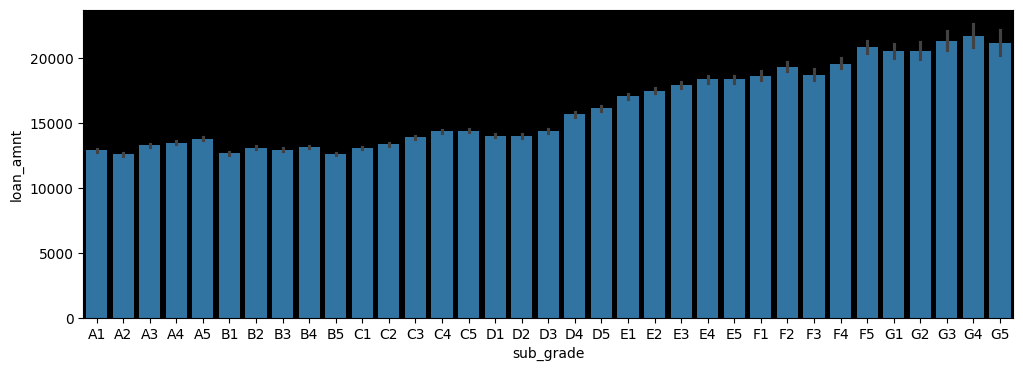

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(data= df, x=df['sub_grade'],y=df['loan_amnt'])
ax= plt.gca()
ax.set_facecolor('Black')

# **Observation**
# Based on the Graph, it can be infered that there is saturation point across all subgrades, with the highest loan amounts observed in the grade "G"

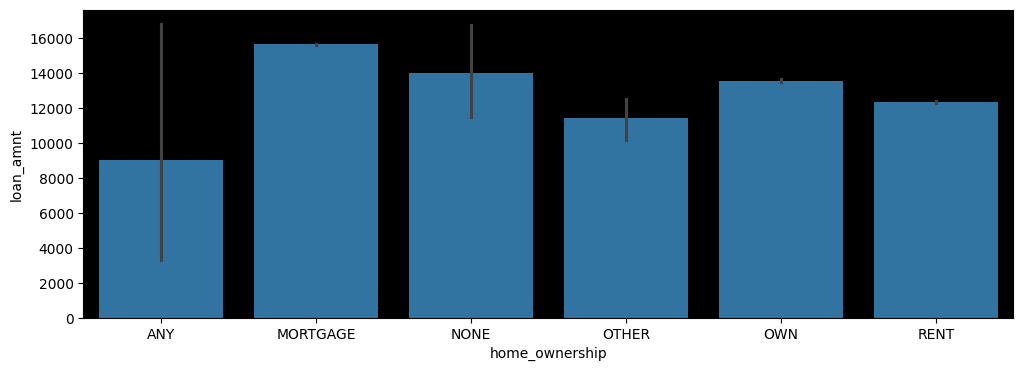

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(data= df, x=df['home_ownership'],y=df['loan_amnt'])
ax= plt.gca()
ax.set_facecolor('Black')

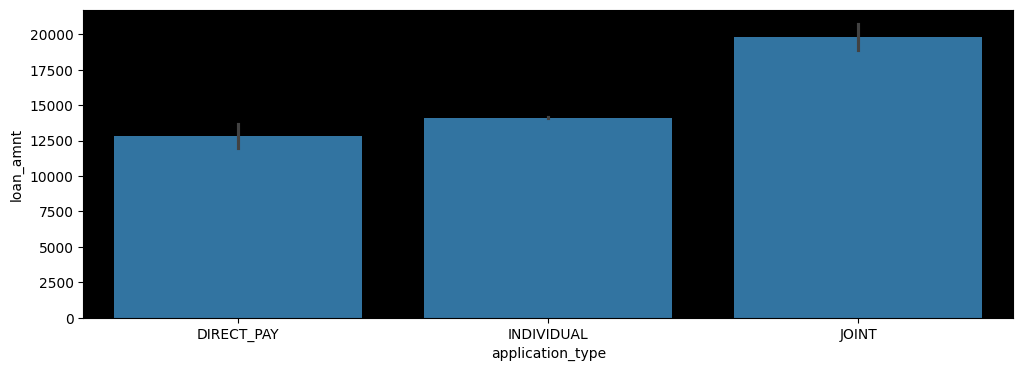

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(data= df, x=df['application_type'],y=df['loan_amnt'])
ax= plt.gca()
ax.set_facecolor('Black')

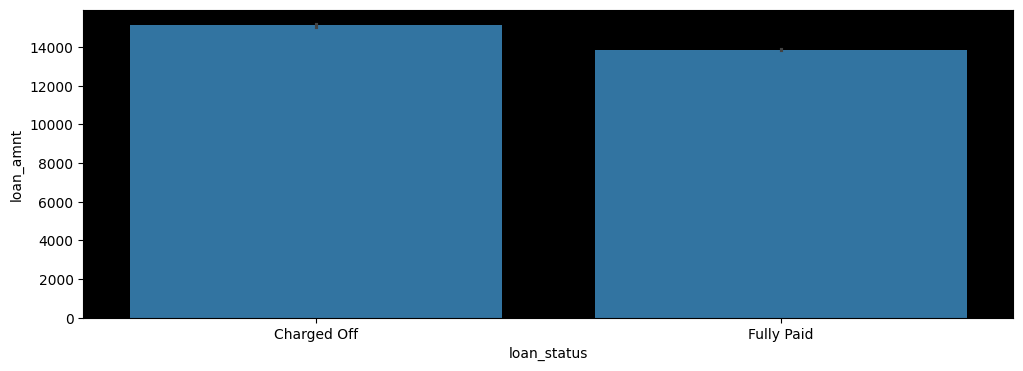

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(data= df, x=df['loan_status'],y=df['loan_amnt'])
ax= plt.gca()
ax.set_facecolor('Black')

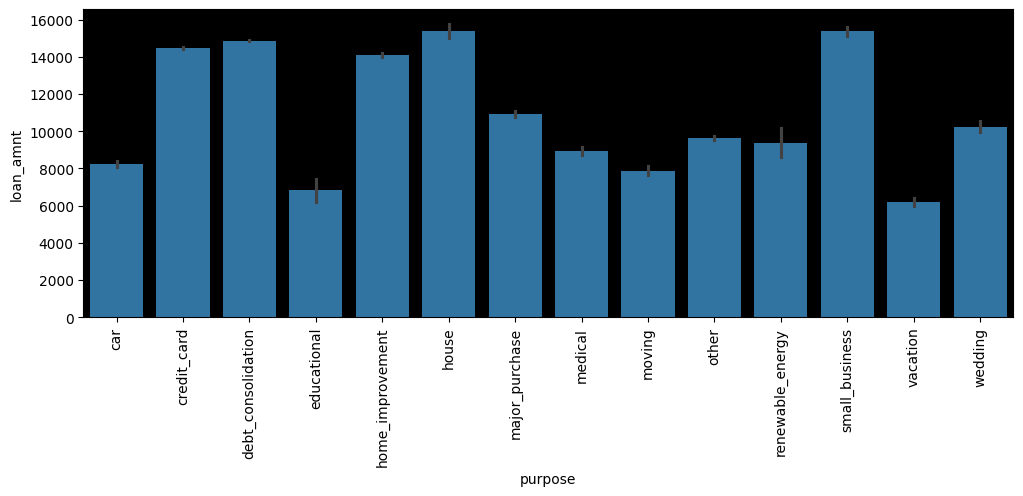

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(data= df, x=df['purpose'],y=df['loan_amnt'])
ax= plt.gca()
plt.xticks(rotation=90)
ax.set_facecolor('Black')

<Axes: xlabel='emp_length', ylabel='count'>

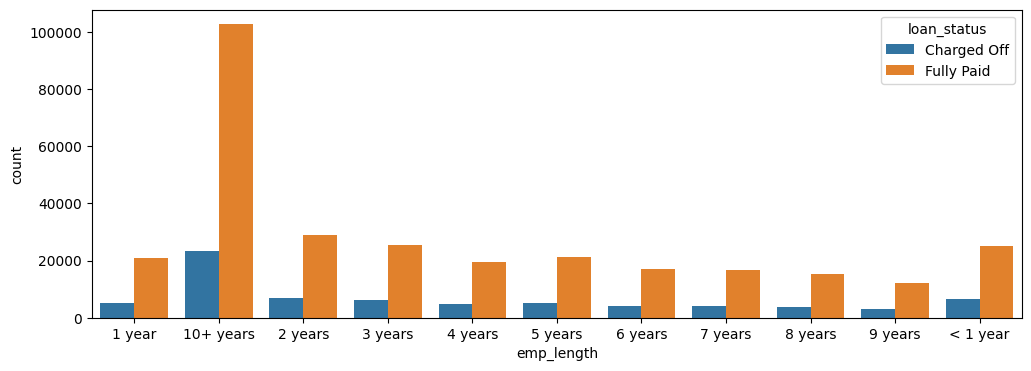

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x=df['emp_length'], hue=df['loan_status'])

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'earliest_year', 'pin_code',
       'issued_year'],
      dtype='object')

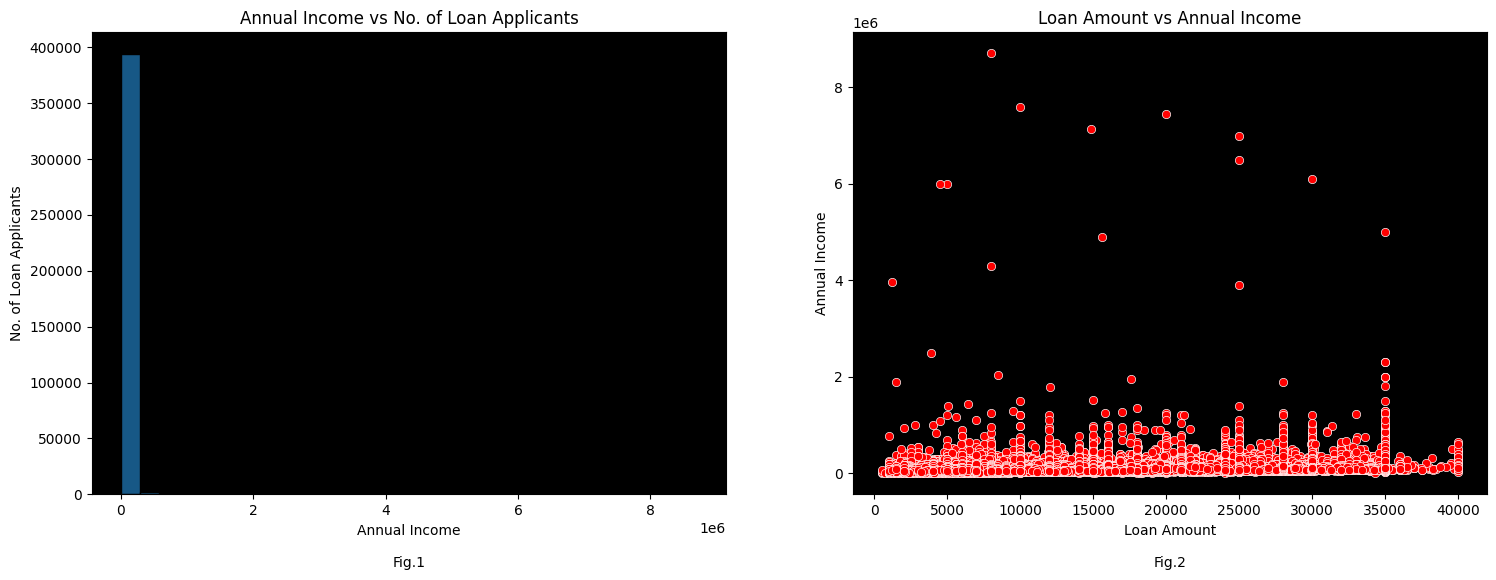

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.histplot(data=df, x='annual_inc', bins=30)
plt.xlabel(f'Annual Income\n\nFig.1')
plt.ylabel('No. of Loan Applicants')
plt.title('Annual Income vs No. of Loan Applicants')
plt.gca().set_facecolor('black')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x=df['loan_amnt'],y=df['annual_inc'], c='red')
plt.xlabel(f'Loan Amount\n\nFig.2')
plt.ylabel('Annual Income')
plt.title('Loan Amount vs Annual Income')
plt.gca().set_facecolor('black')
plt.show()

# **Observation**
# 1. In figure 1, it is noticible that the majority of the applicants have income of approx less than $300,000 per year, with only small number of applicants reporting very high incomes. This trend is also evident in Fig 2 , where data points are densly clustered at the lower end, with only a few points scattered sparsely above.

# 2. The scattered points knowns as Outliers pose a risk of biasing the results of our modeling predictions. Therefore it is advisible to remove these outliers from the dataset to ensure thr accuracy and reliablity of our analysis.

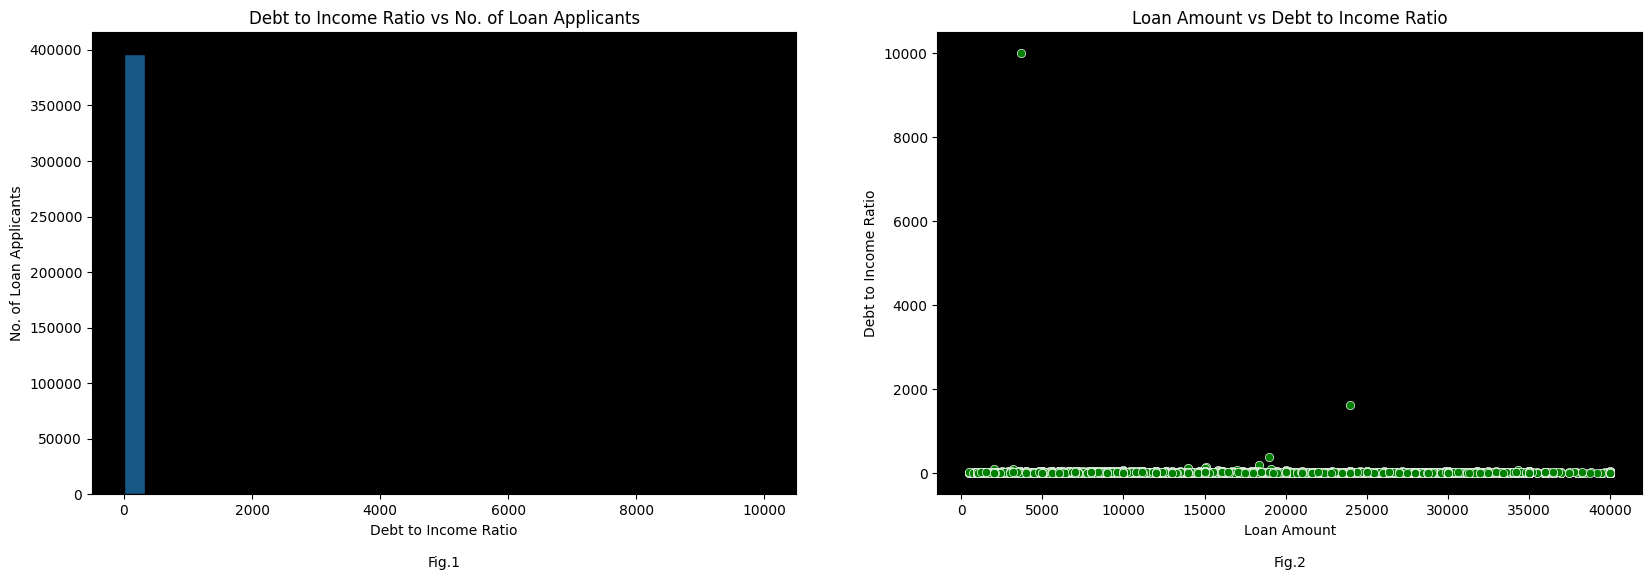

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.histplot(data=df, x='dti', bins=30)
plt.xlabel(f'Debt to Income Ratio\n\nFig.1')
plt.ylabel('No. of Loan Applicants')
plt.title('Debt to Income Ratio vs No. of Loan Applicants')
plt.gca().set_facecolor('black')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x=df['loan_amnt'],y=df['dti'], c='green')
plt.xlabel(f'Loan Amount\n\nFig.2')
plt.ylabel('Debt to Income Ratio')
plt.title('Loan Amount vs Debt to Income Ratio')
plt.gca().set_facecolor('black')
plt.show()

# **Observation**
# 1. Fig 1 illustrates that the majority of applicants have Debt to Income Ratio of approx less than 50, with only a small number reporting very high ratios, This pattern is also evident in Fig 2, where most data points are tightly clustred at the lower end, while only a few points are scattered more widely above.
# 2. The scattered points knowns as Outliers pose a risk of biasing the results of our modeling predictions. Therefore it is advisible to remove these outliers from the dataset to ensure thr accuracy and reliablity of our analysis.

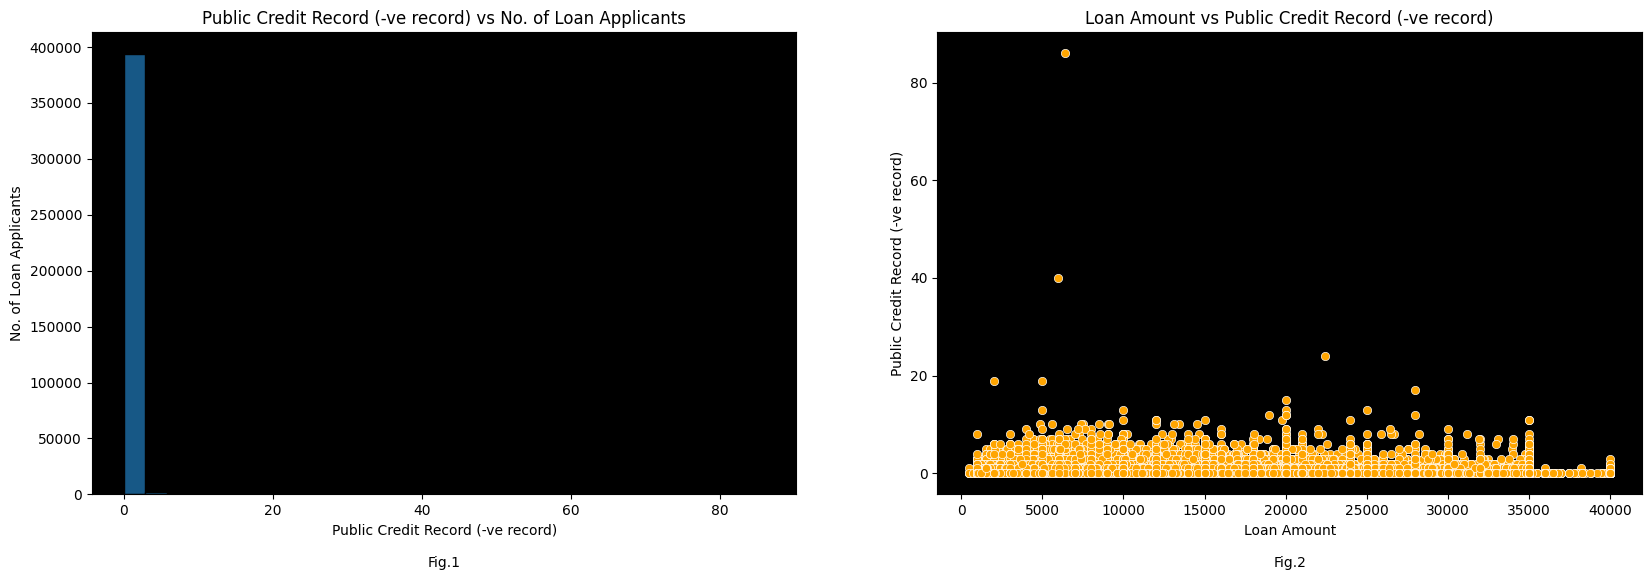

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.histplot(data=df, x='pub_rec', bins=30)
plt.xlabel(f'Public Credit Record (-ve record)\n\nFig.1')
plt.ylabel('No. of Loan Applicants')
plt.title('Public Credit Record (-ve record) vs No. of Loan Applicants')
plt.gca().set_facecolor('black')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x=df['loan_amnt'],y=df['pub_rec'], c='orange')
plt.xlabel(f'Loan Amount\n\nFig.2')
plt.ylabel('Public Credit Record (-ve record)')
plt.title('Loan Amount vs Public Credit Record (-ve record)')
plt.gca().set_facecolor('black')
plt.show()

# **Observation**
# 1. Fig 1 illustrates that the majority of applicants have fewer than 6 bankruptcy records, with only a small number reporting very high ratios, This pattern is also evident in Fig 2, where most data points are tightly clustred at the lower end, while only a few points are scattered more widely above.
# 2. The scattered points knowns as Outliers pose a risk of biasing the results of our modeling predictions. Therefore it is advisible to remove these outliers from the dataset to ensure thr accuracy and reliablity of our analysis.

# **Checking for outliers in Data Features**

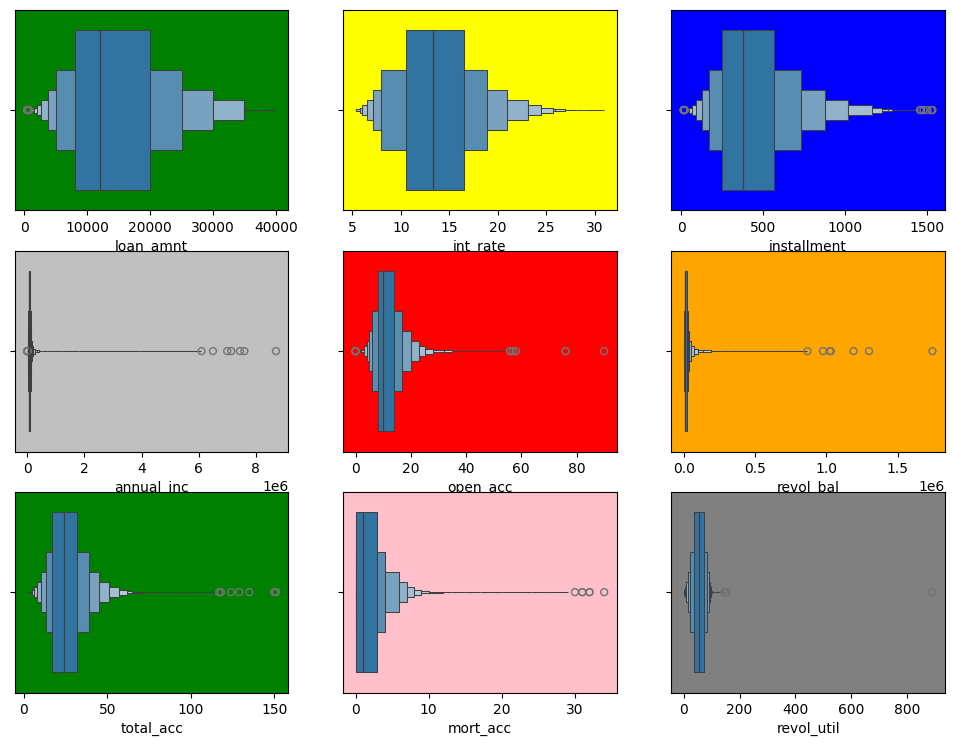

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(4,3,1)
sns.boxenplot(data=df, x= df['loan_amnt'])
plt.gca().set_facecolor('green')

plt.subplot(4,3,2)
sns.boxenplot(data=df, x= df['int_rate'])
plt.gca().set_facecolor('yellow')

plt.subplot(4,3,3)
sns.boxenplot(data=df, x= df['installment'])
plt.gca().set_facecolor('blue')

plt.subplot(4,3,4)
sns.boxenplot(data=df, x= df['annual_inc'])
plt.gca().set_facecolor('silver')

plt.subplot(4,3,5)
sns.boxenplot(data=df, x= df['open_acc'])
plt.gca().set_facecolor('red')


plt.subplot(4,3,6)
sns.boxenplot(data=df, x= df['revol_bal'])
plt.gca().set_facecolor('orange')

plt.subplot(4,3,7)
sns.boxenplot(data=df, x= df['total_acc'])
plt.gca().set_facecolor('green')

plt.subplot(4,3,8)
sns.boxenplot(data=df, x= df['mort_acc'])
plt.gca().set_facecolor('pink')

plt.subplot(4,3,9)
sns.boxenplot(data=df, x= df['revol_util'])
plt.gca().set_facecolor('gray')

plt.show()

# **Data Preprocessing**

In [ ]:
df.duplicated().sum()

0

# **Observation**
# There are No Duplicate values present in Data Set.

# **Analyse Missing Values-**

In [ ]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
earliest_year               0
pin_code                    0
issued_year                 0
dtype: int64

In [ ]:
missing_values= df[['emp_length','revol_util','mort_acc','pub_rec_bankruptcies']]
missing_values.isna().sum()

emp_length              18301
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [ ]:
column_mode= df['emp_length'].mode()[0]
df['emp_length'] = df['emp_length'].fillna(column_mode)

In [ ]:
si= SimpleImputer(strategy= 'mean')
df['mort_acc']= si.fit_transform(df[['mort_acc']])

In [ ]:
si= SimpleImputer(strategy= 'mean')
df['pub_rec_bankruptcies']= si.fit_transform(df[['pub_rec_bankruptcies']])

In [ ]:
si= SimpleImputer(strategy= 'mean')
df['revol_util']= si.fit_transform(df[['revol_util']])

In [ ]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
earliest_year           0
pin_code                0
issued_year             0
dtype: int64

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,earliest_year,issued_year
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648,1997.857667,2013.629074
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.443671,11.886991,2.042867,0.355934,7.198387,1.481725
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,1944.000000,2007.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.900000,17.000000,0.000000,0.000000,1994.000000,2013.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000,1999.000000,2014.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000,2003.000000,2015.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000,2013.000000,2016.000000


In [ ]:
df.describe(include= 'category')

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,initial_list_status,application_type
count,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030
unique,2,7,35,11,6,3,2,14,2,3
top,36 months,B,B3,10+ years,MORTGAGE,Verified,Fully Paid,debt_consolidation,f,INDIVIDUAL
freq,302005,116018,26655,144342,198348,139563,318357,234507,238066,395319


In [ ]:
column_drop_1= ['term' , 'grade', 'sub_grade', 'emp_length','home_ownership', 'verification_status' , 'loan_status', 'purpose'  , 'initial_list_status' ,'application_type', 'earliest_year','pin_code']
df1= df.drop(columns= column_drop_1)
df1

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issued_year
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.000000,0.0,2015
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.000000,0.0,2015
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.000000,0.0,2015
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.000000,0.0,2014
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.000000,0.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,0.000000,0.0,2015
396026,21000.0,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,1.000000,0.0,2015
396027,5000.0,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,0.000000,0.0,2013
396028,21000.0,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,20.0,5.000000,0.0,2012


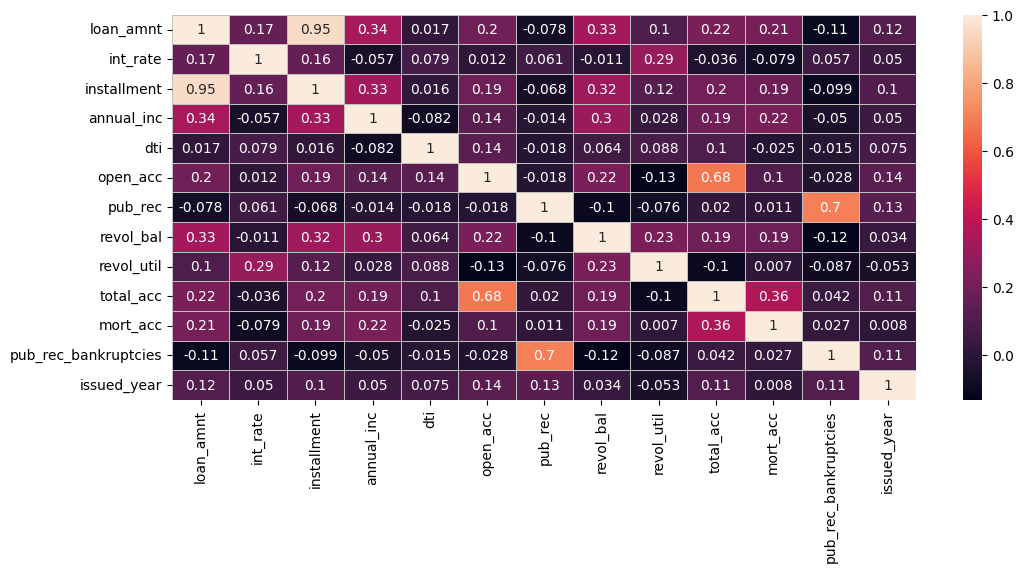

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(df1.corr(),annot= True, linecolor= 'silver',linewidths='0.6')
plt.show()

# **Observation-**



*   The Correlation analysis reveals significant positive correlation among certain varaibles. Specifically the loan amount and installment exhibits a strong correlation of 0.95, indicating a substantial relationship.
*   Aditionally,open accounts and total accounts demonstrates a notable correlation of 0.67, suggesting a positive association.
*   Moreover there exists a meaningful correlation of 0.70 between public records and public record bankruptcies indicating their interconnectedness








# **Outlier Treatment**

In [ ]:
q1= np.quantile(df['loan_amnt'],0.25)
q3= np.quantile(df['loan_amnt'],0.75)
IQR= q3-q1
Lower_whisker= q1-(1.5*IQR)
upper_whisker= q3+(1.5*IQR)
df[(df['loan_amnt']< Lower_whisker) | (df['loan_amnt']> upper_whisker)]
df= df[(df['loan_amnt'] > Lower_whisker) & (df['loan_amnt'] < upper_whisker)]
df.shape

(395836, 25)

# **Observation-**


*   The Distribution of loan amounts in the dataset deviates significantly from the normal distribution indicating a high presence of outliers.
*   To ensure data accuracy and facilitate precise analysis we have opted to remove these outliers from dataset.



In [ ]:
q1= np.quantile(df['int_rate'],0.25)
q3= np.quantile(df['int_rate'],0.75)
IQR= q3-q1
Lower_whisker= q1-(1.5*IQR)
upper_whisker= q3+(1.5*IQR)
df[(df['int_rate']< Lower_whisker) | (df['int_rate']> upper_whisker)][:5]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,earliest_year,pin_code,issued_year
96,12625.0,60 months,25.78,376.36,F,F5,7 years,MORTGAGE,43000.0,Verified,...,19993.0,55.7,31.0,w,INDIVIDUAL,1.0,0.0,2003,00813,2015
97,13400.0,60 months,25.83,399.86,G,G2,10+ years,MORTGAGE,56000.0,Verified,...,28845.0,84.5,44.0,w,INDIVIDUAL,6.0,0.0,2001,93700,2014
133,13075.0,60 months,27.31,401.68,G,G2,10+ years,MORTGAGE,54777.0,Source Verified,...,3845.0,59.2,27.0,f,INDIVIDUAL,2.0,0.0,2000,48052,2015
168,11800.0,60 months,28.99,374.49,G,G5,10+ years,RENT,44011.0,Verified,...,6313.0,67.2,13.0,f,INDIVIDUAL,0.0,1.0,2004,22690,2016
204,34350.0,60 months,28.99,1090.13,G,G5,3 years,RENT,84000.0,Verified,...,8400.0,85.7,23.0,w,INDIVIDUAL,0.0,1.0,2003,22690,2016


# **Observation-**


*   Regarding the interest rate, numerous outliers are present in the dataset. However its essential to note that these outliers play a significant role in the data as they are influenced by factors such as loan amount and tenure.
*   Therefore it is advisible not to remove these outliers from dataset, as they contribute valuable information to our analysis.



In [ ]:
q1= np.quantile(df['installment'],0.25)
q3= np.quantile(df['installment'],0.75)
IQR= q3-q1
Lower_whisker= q1-(1.5*IQR)
upper_whisker= q3+(1.5*IQR)
df[(df['installment']< Lower_whisker) | (df['installment']> upper_whisker)][:5]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,earliest_year,pin_code,issued_year
11,35000.0,36 months,14.64,1207.13,C,C3,8 years,MORTGAGE,130000.00,Verified,...,81263.0,18.7,61.0,w,INDIVIDUAL,4.0,0.0,1984,00813,2014
18,34000.0,36 months,7.90,1063.87,A,A4,10+ years,RENT,130580.00,Verified,...,8767.0,11.9,36.0,f,INDIVIDUAL,3.0,0.0,1990,70466,2014
57,35000.0,36 months,14.16,1198.94,C,C2,9 years,MORTGAGE,118497.84,Verified,...,8148.0,83.1,59.0,f,INDIVIDUAL,3.0,0.0,1995,29597,2014
95,30000.0,36 months,16.49,1061.99,D,D3,10+ years,RENT,101000.00,Verified,...,6080.0,76.0,15.0,f,INDIVIDUAL,2.0,1.0,2003,70466,2014
103,30000.0,36 months,15.31,1044.52,C,C2,9 years,MORTGAGE,108000.00,Verified,...,19430.0,84.8,15.0,w,INDIVIDUAL,0.0,0.0,1998,93700,2012


In [ ]:
q1= np.quantile(df['annual_inc'],0.25)
q3= np.quantile(df['annual_inc'],0.75)
IQR= q3-q1
Lower_whisker= q1-(1.5*IQR)
upper_whisker= q3+(1.5*IQR)
df[(df['annual_inc']< Lower_whisker) | (df['annual_inc']> upper_whisker)][:5]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,earliest_year,pin_code,issued_year
87,30000.0,60 months,24.70,875.28,G,G1,5 years,MORTGAGE,187321.0,Verified,...,54810.0,93.4,52.0,f,INDIVIDUAL,3.000000,0.0,2002,29597,2012
139,20000.0,36 months,10.37,648.83,B,B3,< 1 year,MORTGAGE,170000.0,Verified,...,140820.0,76.2,19.0,f,INDIVIDUAL,1.813991,0.0,1990,22690,2011
195,24000.0,60 months,24.50,697.42,F,F3,10+ years,MORTGAGE,224000.0,Verified,...,5807.0,58.1,32.0,f,INDIVIDUAL,6.000000,0.0,2001,11650,2014
221,25000.0,60 months,12.49,562.33,B,B5,10+ years,RENT,170000.0,Verified,...,2390.0,5.4,13.0,f,INDIVIDUAL,0.000000,0.0,1998,05113,2014
228,35000.0,36 months,12.99,1179.12,C,C2,10+ years,MORTGAGE,350000.0,Verified,...,216194.0,45.4,43.0,w,INDIVIDUAL,2.000000,0.0,1992,70466,2016


In [ ]:
q1= np.quantile(df['open_acc'],0.25)
q3= np.quantile(df['open_acc'],0.75)
IQR= q3-q1
Lower_whisker= q1-(1.5*IQR)
upper_whisker= q3+(1.5*IQR)
df[(df['open_acc']< Lower_whisker) | (df['open_acc']> upper_whisker)][:5]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,earliest_year,pin_code,issued_year
11,35000.0,36 months,14.64,1207.13,C,C3,8 years,MORTGAGE,130000.0,Verified,...,81263.0,18.7,61.0,w,INDIVIDUAL,4.0,0.0,1984,00813,2014
170,35000.0,60 months,23.10,988.68,E,E4,8 years,MORTGAGE,125388.0,Verified,...,128741.0,58.6,59.0,f,INDIVIDUAL,6.0,0.0,1984,48052,2013
191,35000.0,60 months,17.57,880.61,D,D4,10+ years,MORTGAGE,150000.0,Source Verified,...,44777.0,62.7,52.0,f,INDIVIDUAL,1.0,0.0,1998,11650,2015
346,20400.0,60 months,18.24,520.70,D,D5,4 years,RENT,51000.0,Source Verified,...,13284.0,26.0,38.0,w,INDIVIDUAL,0.0,0.0,1994,93700,2014
364,25000.0,60 months,11.44,549.07,B,B4,10+ years,MORTGAGE,99000.0,Verified,...,29067.0,39.2,49.0,w,INDIVIDUAL,3.0,0.0,1981,30723,2015


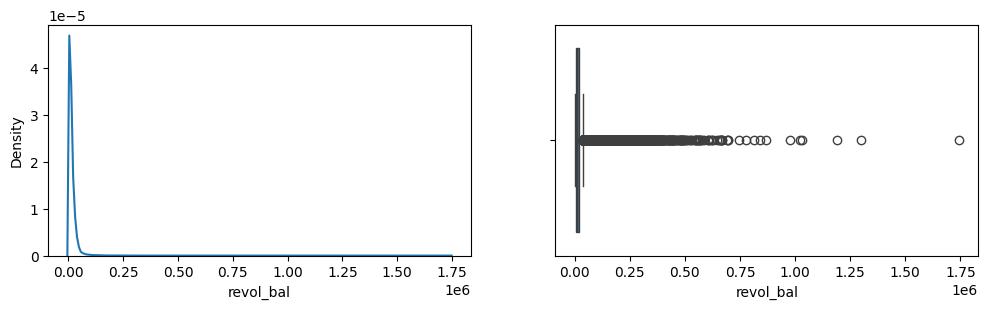

In [ ]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.kdeplot(df['revol_bal'])
plt.subplot(1,2,2)
sns.boxplot(x=df['revol_bal'])
plt.show()

In [ ]:
q1= np.quantile(df['revol_bal'],0.25)
q3= np.quantile(df['revol_bal'],0.75)
IQR= q3-q1
Lower_whisker= q1-(1.5*IQR)
upper_whisker= q3+(1.5*IQR)
df[(df['revol_bal']< Lower_whisker) | (df['revol_bal']> upper_whisker)]
df= df[(df['revol_bal'] > Lower_whisker) & (df['revol_bal'] < upper_whisker)]

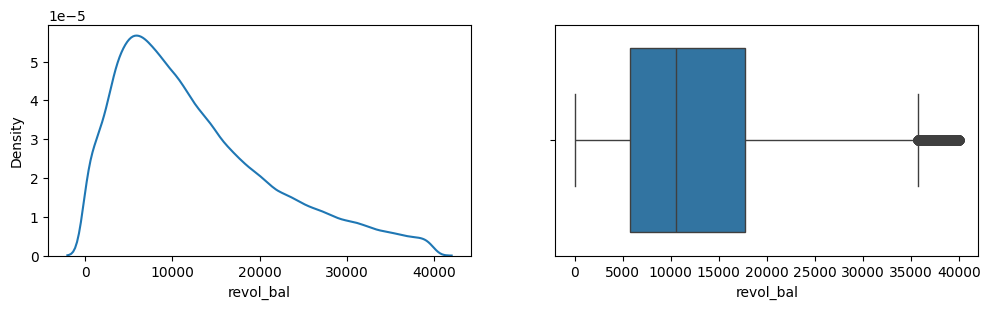

In [ ]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.kdeplot(df['revol_bal'])
plt.subplot(1,2,2)
sns.boxplot(x=df['revol_bal'])
plt.show()

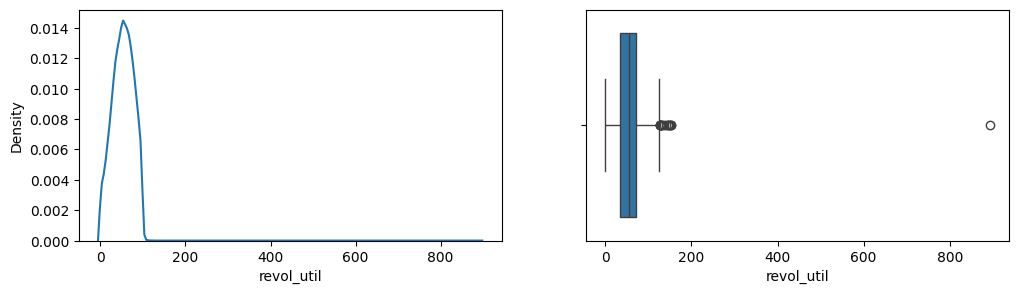

In [ ]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.kdeplot(df['revol_util'])
plt.subplot(1,2,2)
sns.boxplot(x=df['revol_util'])
plt.show()

# **Observation-**


*   THe Graph illustrates a pronounced right skewness, indicating a concentration of values towards the higher end and a subsequent decline in density towards the lower end.
*   Additionally the boxplot reveals the substantial range of continuous values. To ensure data conformity and achieve a more normalised distribution, we remove excess values and outliers from dataset.



In [ ]:
q1= np.quantile(df['revol_util'],0.25)
q3= np.quantile(df['revol_util'],0.75)
IQR= q3-q1
Lower_whisker= q1-(1.5*IQR)
upper_whisker= q3+(1.5*IQR)
df[(df['revol_util']< Lower_whisker) | (df['revol_util']> upper_whisker)]
df= df[(df['revol_util'] > Lower_whisker) & (df['revol_util'] < upper_whisker)]

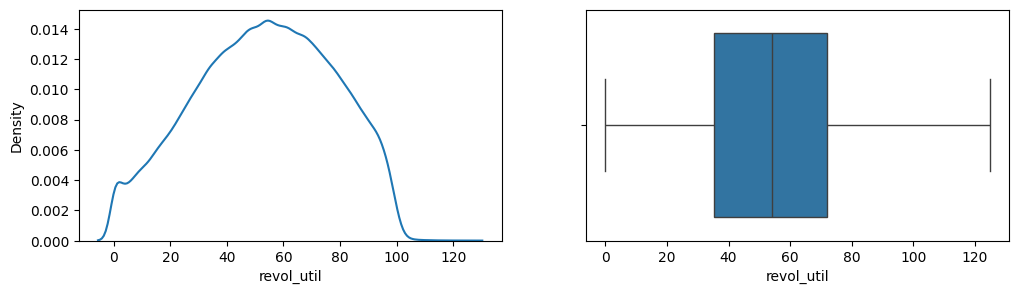

In [ ]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.kdeplot(df['revol_util'])
plt.subplot(1,2,2)
sns.boxplot(x=df['revol_util'])
plt.show()

# **Observation-**


*   Currently, the data exhibits a closer approximation to a normal distribution. Furthermore examination through the boxplot indicates the absence of outliers.
*   With these observations, the data is now primed for accurate prediction and formulation, enhancing its overall quality and realibility.



# ***Feature Engineering***

# **Performing Label Encoding for the Column initial list status-**

In [ ]:
le= LabelEncoder()
le

LabelEncoder()

In [ ]:
df['loan_status']= df['loan_status'].replace('Fully Paid',1)
df['loan_status']= df['loan_status'].replace('Charged Off',0)
df['loan_status']

0         1
1         1
2         1
3         1
4         0
         ..
396024    1
396025    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 374589, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
df['initial_list_status'] = le.fit_transform(df['initial_list_status'])


In [ ]:
df['initial_list_status'][:5]

0    1
1    0
2    0
3    0
4    0
Name: initial_list_status, dtype: int64

# **Observation-**
# Label Encoding was applied to the status column, representing whether individuals obtained loan approval ("w" for approved) and ("f" for not approved). In this encoding scheme, "w" is represented as 1 and "f" as 0 in the dataset

# Converting the "term" column which contains object values representing terms in months into integer value for 36 months and 60 months in the dataset.

In [ ]:
df['months']= df['term'].str.split(' ').str[-2]
df['months']= pd.to_numeric(df['months'])
df['emp_length']= df['emp_length'].str.split(' ').str[-2]
df['updt_emp_length_yrs']= df['emp_length'].replace('10+','10')
df['updt_emp_length_yrs']= pd.to_numeric(df['updt_emp_length_yrs'])
df= df.drop(columns=['term','emp_length'])

# **Performong the Target Column Loan Status-**

In [ ]:
df['loan_status']= le.fit_transform(df['loan_status'])
df['loan_status'][:5]

0    1
1    1
2    1
3    1
4    0
Name: loan_status, dtype: int64

# **Observation-**
# The Target volumn has been label encoded with "fully paid" represented by 0 and "charged off" as 1

# **To Prepare the dataset for Logestic Regression Modelling and analysis, we will focus on retaining the most revelant columns while eliminating unnecessary ones. This ensures that the data is streamlined for effective modelling, prioritizing features essential for the analysis**

In [ ]:
df.shape

(374589, 25)

# **Performing One Hot Encoding or with Dummy vlaues for the Modelling-**

In [ ]:
df[:2]

,loan_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,earliest_year,pin_code,issued_year,months,updt_emp_length_yrs
0,10000.0,11.44,329.48,B,B4,RENT,117000.0,Not Verified,1,vacation,...,25.0,1,INDIVIDUAL,0.0,0.0,1990,22690,2015,36,10
1,8000.0,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,1,debt_consolidation,...,27.0,0,INDIVIDUAL,3.0,0.0,2004,05113,2015,36,4


In [ ]:
for column in ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'earliest_year', 'pin_code']:
  df[column]= df[column].astype(str)
df['earliest_year'] =df['earliest_year'].astype(int)

# **Data Preprocessing for Modelling-**

In [ ]:
X= df.drop(columns=['loan_status'])
y= df['loan_status']

In [ ]:
for column in ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'earliest_year', 'pin_code']:
    X[column] = le.fit_transform(X[column])


# We will now proceed to prepare the dataset for the ***Testing and Training*** phase of the Algorithm

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374589 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             374589 non-null  float64
 1   int_rate              374589 non-null  float64
 2   installment           374589 non-null  float64
 3   grade                 374589 non-null  int64  
 4   sub_grade             374589 non-null  int64  
 5   home_ownership        374589 non-null  int64  
 6   annual_inc            374589 non-null  float64
 7   verification_status   374589 non-null  int64  
 8   purpose               374589 non-null  int64  
 9   dti                   374589 non-null  float64
 10  open_acc              374589 non-null  float64
 11  pub_rec               374589 non-null  float64
 12  revol_bal             374589 non-null  float64
 13  revol_util            374589 non-null  float64
 14  total_acc             374589 non-null  float64
 15  initi

In [ ]:
print(X.shape)
print(y.shape)

(374589, 24)
(374589,)


In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)
X_val, X_test, y_val,y_test= train_test_split(X_test,y_test,test_size=0.5, random_state=43)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)



(262212, 24)
(262212,)
(56188, 24)
(56188,)
(56189, 24)
(56189,)


In [ ]:
X_train[:2]

,loan_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,earliest_year,pin_code,issued_year,months,updt_emp_length_yrs
365865,5600.0,14.64,193.15,2,12,5,65000.0,2,9,3.45,...,23.0,0,1,0.0,0.0,43,4,2014,36,10
302179,10000.0,12.35,333.82,1,8,5,59000.0,0,1,15.07,...,15.0,1,1,0.0,0.0,50,1,2013,36,10


In [ ]:
X_test[:2]

,loan_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,earliest_year,pin_code,issued_year,months,updt_emp_length_yrs
78071,9600.0,15.10,333.26,2,11,5,55000.0,0,2,13.37,...,17.0,0,1,0.0,0.0,49,6,2013,36,7
70575,2000.0,11.53,65.99,1,9,1,75000.0,1,2,9.14,...,48.0,1,1,7.0,0.0,47,4,2015,36,10


In [ ]:
y_train.value_counts()

loan_status
1    210476
0     51736
Name: count, dtype: int64

# **Observation-**


*   The value count above reveal an imbalance in distribution of outcomes '1' and '0' within the Dataset. To address this imbalance, the SMOTE (Synthetic Minority Over Sampling Technique) method can be employed. SMOTE overssamples the minority class by generating synthetic instances based on Nearest Neighbour Concept.
*   Its important to note that oversampling will only be applied to the training data. This ensures that the model is trained on balanced data while maintaining the original distribution of outcomes in validation and testing dataset.



In [ ]:
smote= SMOTE(random_state=42)
X_train,y_train = smote.fit_resample(X_train,y_train)

In [ ]:
print(f'Training Data:\n{y_train.value_counts()}')

Training Data:
loan_status
1    210476
0    210476
Name: count, dtype: int64


# **Assumptions Multicollinearity Checking by VIF Score-**

In [ ]:
vif_data= pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"]= [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
print(pd.DataFrame(vif_data))

                Variable         VIF
0              loan_amnt  257.851457
1               int_rate  269.331757
2            installment  228.372297
3                  grade   44.507717
4              sub_grade  163.100710
5         home_ownership    4.867771
6             annual_inc    3.667304
7    verification_status    2.912113
8                purpose    2.610996
9                    dti    2.050445
10              open_acc   14.637792
11               pub_rec    1.920004
12             revol_bal    5.947938
13            revol_util   10.517768
14             total_acc   14.050187
15   initial_list_status    1.546250
16      application_type  523.357791
17              mort_acc    2.762600
18  pub_rec_bankruptcies    2.016470
19         earliest_year   65.937061
20              pin_code    4.780966
21           issued_year  752.321718
22                months  132.437312
23   updt_emp_length_yrs    4.689605


# **Observation-**


# *   Based on VIF (Varaince Inflation Factor) values observed above, it is evident that several columns exhibit collinearity as indicated by high VIF scores.
# *   Collinearity must be addressed to uphold the stability and interpretability of the model



In [ ]:
X_train = X_train.drop(columns = ['int_rate','installment','sub_grade','application_type', 'earliest_year','issued_year','months', 'total_acc'])

In [ ]:
vif_data= pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"]= [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
print(vif_data.sort_values(by = ['VIF'],ascending= False))

                Variable       VIF
10            revol_util  7.751816
7               open_acc  6.591057
0              loan_amnt  6.337188
9              revol_bal  5.557774
1                  grade  4.308686
14              pin_code  4.296104
15   updt_emp_length_yrs  4.096614
2         home_ownership  3.746142
3             annual_inc  3.567457
4    verification_status  2.887075
5                purpose  2.334305
12              mort_acc  2.293153
6                    dti  2.026394
13  pub_rec_bankruptcies  1.993900
8                pub_rec  1.913557
11   initial_list_status  1.448615


# **Note-**
# Remove the collinear columns from validation and testing data also to get and fit the responsiveness of the data with equal shape and size.

In [ ]:
X_val= X_val.drop(columns = ['int_rate','installment','sub_grade','application_type', 'earliest_year','issued_year','months', 'total_acc'])
X_test= X_test.drop(columns = ['int_rate','installment','sub_grade','application_type', 'earliest_year','issued_year','months', 'total_acc'])

# **Scaling Via MINMAXSCALER()**

# 1)   **The MinMaxScaler operates by scaling each features values to a range between 0 and 1. This is achieved by subtracting the minimum value from each feature and then Dividing by the range, which is the difference between the original maximum and original minimum values.**
# 2)  **By employing MinMaxScaler, the distribution shape of original data is maintained, ensuring that the intrinsic information within the dataset remains unchanged.**



In [ ]:
scaling= MinMaxScaler()
scaling

MinMaxScaler()

In [ ]:
X_train = pd.DataFrame(scaling.fit_transform(X_train), columns= X_train.columns)
X_train[:2]

,loan_amnt,grade,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,initial_list_status,mort_acc,pub_rec_bankruptcies,pin_code,updt_emp_length_yrs
0,0.136364,0.333333,1.0,0.008553,1.0,0.692308,0.000345,0.078947,0.0,0.103851,0.354451,0.0,0.0,0.0,0.444444,1.0
1,0.254011,0.166667,1.0,0.007763,0.0,0.076923,0.001507,0.078947,0.0,0.283946,0.711307,1.0,0.0,0.0,0.111111,1.0


In [ ]:
X_val= pd.DataFrame(scaling.transform(X_val),columns=X_val.columns)
X_val[:2]

,loan_amnt,grade,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,initial_list_status,mort_acc,pub_rec_bankruptcies,pin_code,updt_emp_length_yrs
0,0.183155,0.5,1.0,0.004605,0.5,0.384615,0.002912,0.236842,0.0,0.022081,0.150762,0.0,0.0000,0.0,0.444444,0.0
1,0.788770,0.5,0.2,0.009211,1.0,0.153846,0.001126,0.118421,0.0,0.329357,0.403368,0.0,0.0625,0.0,0.777778,1.0


In [ ]:
X_test= pd.DataFrame(scaling.transform(X_test),columns= X_test.columns)
X_test[:2]

,loan_amnt,grade,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,initial_list_status,mort_acc,pub_rec_bankruptcies,pin_code,updt_emp_length_yrs
0,0.243316,0.333333,1.0,0.007237,0.0,0.153846,0.001337,0.105263,0.0,0.234959,0.697674,0.0,0.00000,0.0,0.666667,0.666667
1,0.040107,0.166667,0.2,0.009868,0.5,0.153846,0.000914,0.197368,0.0,0.559690,0.620690,1.0,0.21875,0.0,0.444444,1.000000


# **Lets Prepare for the Logistic Regression for the Analysis with the Algorithm-**

In [ ]:
lr= LogisticRegression(max_iter=1000)
lr

LogisticRegression(max_iter=1000)

In [ ]:
model= lr.fit(X_train,y_train)
model

LogisticRegression(max_iter=1000)

In [ ]:
pd.Series((zip(X.columns,model.coef_[0])))

0               (loan_amnt, -1.3511910839050891)
1                 (int_rate, -1.976777259735695)
2             (installment, 0.12328774082464017)
3                    (grade, 26.127558885182953)
4                (sub_grade, 0.6300021713947044)
5           (home_ownership, 0.2539785964990364)
6               (annual_inc, -13.96676278587435)
7     (verification_status, -2.4244759415231165)
8                  (purpose, -9.130796708394934)
9                      (dti, 0.5814339338256844)
10                (open_acc, -1.026778036691934)
11                  (pub_rec, 0.836718250044083)
12                (revol_bal, 3.013385953482211)
13            (revol_util, -0.28045587280899226)
14              (total_acc, -3.0013471908004905)
15     (initial_list_status, 0.1396805854533711)
dtype: object

In [ ]:
y_predval= model.predict(X_val)
y_predval

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
y_pred= model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

# **Actual and Predicted values for the Validation Data**

In [ ]:
test1= pd.DataFrame({"Actual": y_val, "Predicted":y_predval})
test1[:10]

,Actual,Predicted
151016,1,0
346251,0,0
352698,1,1
32684,1,0
7401,1,1
55279,1,0
240079,1,1
131477,1,1
216743,1,1
217320,1,0


# **Actual and Predicted values for the Test Data**

In [ ]:
test1= pd.DataFrame({"Actual": y_test, "Predicted":y_pred})
test1[:10]

,Actual,Predicted
78071,1,0
70575,1,1
319702,1,1
24059,1,1
129453,0,0
57366,1,1
330114,1,1
334179,1,1
126252,1,1
329008,1,1


In [ ]:
r2= model.score(X_val,y_val)
r2

0.675233145867445

# **Check for Residuals-**

In [ ]:
Error= test1['Actual']- test1['Predicted']
Error.mean()

0.189645660182598

# **Checking for Adjusted R2 score-**
# Formula- 1-(1-r2)*(n-1)/(n-d-1)
where:


*  r2 is the Score
*  n is no of Rows
*  d is no of Features







In [ ]:
n,d = X_val.shape
print("No of Rows:",n, "Features:", d)
Numerator= (1-r2)*(n-1)
Denominator= (n-d-1)
Adj_r2=1-(Numerator/Denominator)
print("Adj_r2:",Adj_r2)

No of Rows: 56188 Features: 16
Adj_r2: 0.6751406378176306


# **Training Prediction Score-**

In [ ]:
model.score(X_train,y_train)

0.6924019840741937

# **Prediction Score for Testing Data-**

In [ ]:
model.score(X_test,y_test)

0.6774101692502091

# **Checking for Confusion Matrix-**

In [ ]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[ 7417,  3735],
       [14391, 30646]])

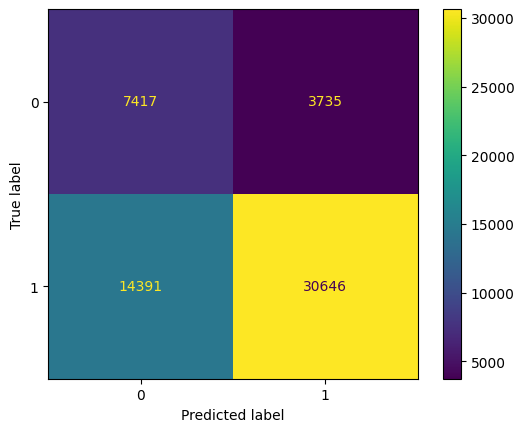

In [ ]:
ConfusionMatrixDisplay(cm).plot();

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.34      0.67      0.45     11152
           1       0.89      0.68      0.77     45037

    accuracy                           0.68     56189
   macro avg       0.62      0.67      0.61     56189
weighted avg       0.78      0.68      0.71     56189



# **Precision Score-**
# Precision measures the proportion of correctly predicted positive instance out of all instances that the model predicted as positive in the dataset

In [ ]:
P= precision_score(y_test,y_pred)
P

0.8913644163927751

# **Recall Score-**
# Recall measures how many actual positive items were correctly identified by model

In [ ]:
R= recall_score(y_test,y_pred)
R

0.680462730643693

# **F1 Score-**
# F1 score is the single metric that combines precision and recall. It provides a balance bwtween the two by calculating the harmonic mean of precision and recall. This means it considers both false positive and false negative when evaluating the models performance. A higher F1 score indicates better overall performance, taking into account both precision and recall.
# Formula for F1 score:- 2*P*R/P+R

In [ ]:
f1_score(y_test,y_pred)

0.7717645873731396

# **Checking for Probabilities for the class 0 and class 1-**


*   We typically examine the probabilities and predict values for class 1 when assessing each class probabilities and predictions including class 0 and class 1.
*   The below values for the probability for the class 0 for the First column and class 1 for second column.



In [ ]:
Probability= model.predict_proba(X_test)
Probability[:10]

array([[0.76999974, 0.23000026],
       [0.12556718, 0.87443282],
       [0.27203357, 0.72796643],
       [0.19173722, 0.80826278],
       [0.5958043 , 0.4041957 ],
       [0.08772966, 0.91227034],
       [0.15020939, 0.84979061],
       [0.11148027, 0.88851973],
       [0.14331859, 0.85668141],
       [0.15977825, 0.84022175]])

# **Here we are extracting for class 1 probabilities because we always used to predict the values for the class 1 to check the actual and the predicted values where the certain model is predicting for the actual 1 in the predicted values or not.**

In [ ]:
probabilities= Probability[:,1]
probabilities

array([0.23000026, 0.87443282, 0.72796643, ..., 0.7534371 , 0.41201267,
       0.79625862])

# **Checking the TPR with respect to FPR using ROC curve-**
# We commonly utilize the ROC curve to evaluate the performance of a model by comparing the actual test values with the predicted porbabilities. This enables us to determine the true positive rate (TPR) at different thresholds, visualizing how the models predictions align with the actual outcomes through the ROC graph.

In [ ]:
fpr,tpr,threshold= roc_curve(y_test, probabilities)
print(fpr)
print(tpr)
print(threshold)

[0.00000000e+00 8.96700143e-05 8.96700143e-05 ... 9.99820660e-01
 9.99820660e-01 1.00000000e+00]
[0.         0.         0.00117681 ... 0.9999778  1.         1.        ]
[2.         1.         0.97512891 ... 0.02511838 0.02177777 0.01897663]


Text(0, 0.5, 'tpr')

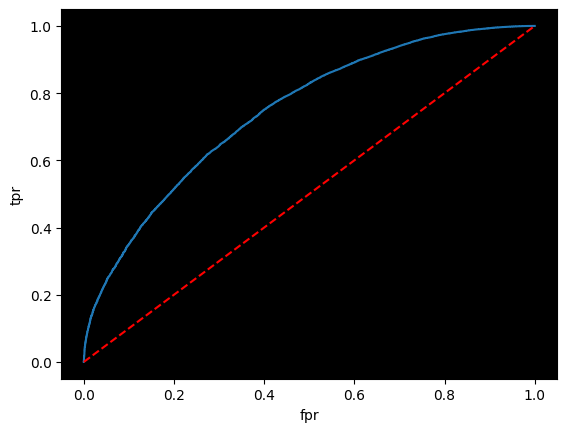

In [ ]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], '--', color='red')
plt.gca().set_facecolor('black')
plt.xlabel("fpr")
plt.ylabel("tpr")

# **Observation-**
# From the graph when 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values form the negative ones. This is so because the classifier is able to detect more numbers of True positive and True negative than False negative and False positives.

# **Checking the roc_acu_score for the above graph-**

In [ ]:
roc_auc_score(y_test, probabilities)

0.7457480162413249

# **Analysing the Precision Recall Curve-**

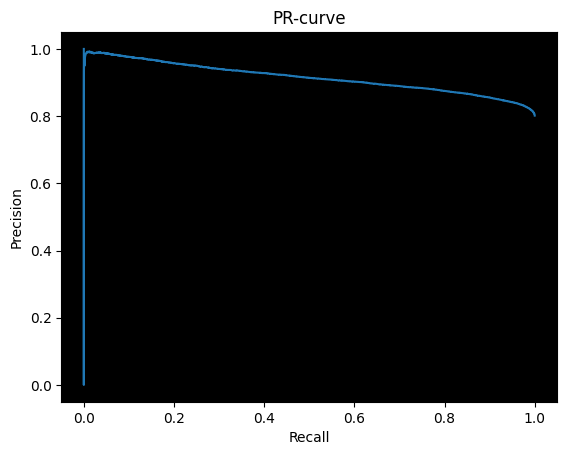

In [ ]:
precision,recall,threshold = precision_recall_curve(y_test, probabilities)
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-curve')
plt.gca().set_facecolor('black')
plt.show()

# **Observation-**
# Here we observe that precison is high while recall is low, indicating near perfect precisoin but very low recall values,almost approaching 0. This discrepancy might be attributed to imbalanced data or multicollinearity issues.

# **Ingishts and Recommendations:-**


1.   80% of the customershave fulfilled their loan obligations entirrly, while the remaining 20% are catergorised as defaulters.
2.   The organization can utilize the trained model to predict whether an individual is likely to fulfill their loan obligation or become a defaulter.
3.   The model attains a 89% F1 score for the negative class (Fully Paid) and 62% F1 score for the positive class (Charged off).
4. Through the acquisition of additional data, the adoption of a more intricate model or the refinement of the hyperparameters, it is feasible to enhance the performance of the model.
5. With an area under the ROC curve (ROC AUC) of 0.73, the model correctly classifies approx 73% of instances, signifying good performance. However their remains room for enhancement. The precision-recall curve illustrates the trade-off between precision and recall as the threshold varies.
6. A higher threshold yeilds higher precision but lower recall, and vice versa. The optimal point on the curve is determined by the specific requirement of the application.
7. Following dataset balancing, significant changes are observed in the precision and recall scores for both the classes. The accuracy of the Logistic Regression Classifier on the test set is 0.891, indicating decent performance that is not merly due to chance.
8. The feature that significantly influenced the models outcome are 'grade' and 'pub_rec' representing LoanTap's assigned loan grade and negative records on the borrowers public credit profile respectively.
9. Additionally the analysis indicates that applicants from regions with the pincode '11650', '86630' and '93700' have not made any loan repayments. This suggests two possibilities:-
a) There may be missing data regarding loan repayment for those regions.
b) Applicants from these regions are unlikely to repay the loan granted by LoanTap
10. Based on these findings, LoanTap should carefully evaluate applicants from these regions to mitigate potential risks.


